   Gender  Hemoglobin   MCH  MCHC   MCV  Result
0       1        14.9  22.7  29.1  83.7       0
1       0        15.9  25.4  28.3  72.0       0
2       0         9.0  21.5  29.6  71.2       1
3       0        14.9  16.0  31.4  87.5       0
4       1        14.7  22.0  28.2  99.5       0

=== Naïve Bayes ===
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        61
           1       0.90      0.98      0.94        46

    accuracy                           0.94       107
   macro avg       0.94      0.95      0.94       107
weighted avg       0.95      0.94      0.94       107


=== Random Forest ===
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        46

    accuracy                           1.00       107
   ma

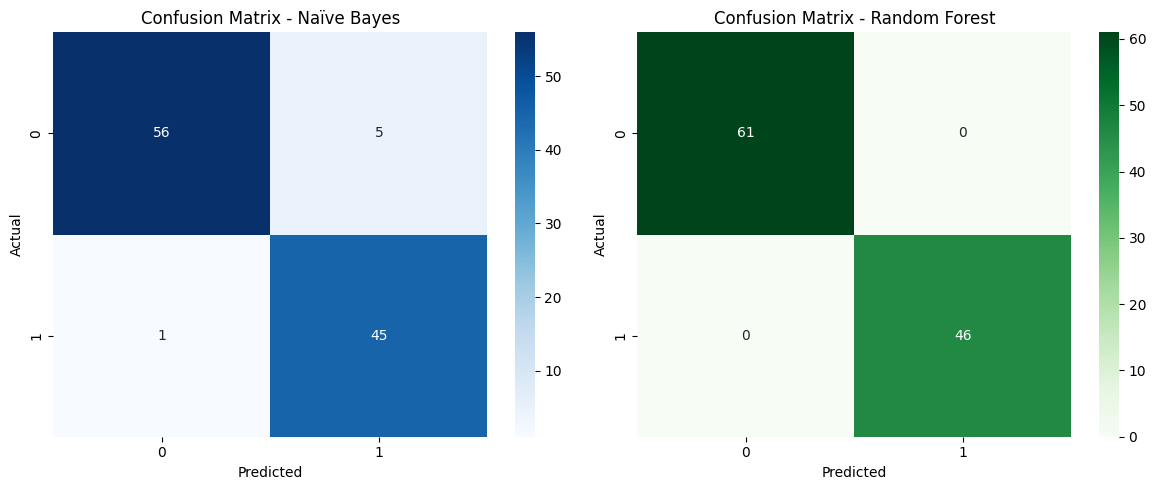

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv("anemia.csv")

# Tampilkan isi dataset
print(df.head())

# Cek data kosong
df.fillna(df.median(), inplace=True)

# Hapus duplikat
df.drop_duplicates(inplace=True)

# Asumsi kolom terakhir adalah target
X = df.iloc[:, :-1]  # Semua kolom kecuali yang terakhir sebagai fitur
y = df.iloc[:, -1]   # Kolom terakhir sebagai target

# Jika ada kolom kategorikal, lakukan encoding
X = pd.get_dummies(X)

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Model Naïve Bayes**
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluasi Naïve Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

print("\n=== Naïve Bayes ===")
print(f'Accuracy: {nb_accuracy:.2f}')
print(f'Precision: {nb_precision:.2f}')
print(f'Recall: {nb_recall:.2f}')
print(f'F1 Score: {nb_f1:.2f}')
print(classification_report(y_test, y_pred_nb))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("\n=== Random Forest ===")
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'F1 Score: {rf_f1:.2f}')
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y), ax=axes[0])
axes[0].set_title("Confusion Matrix - Naïve Bayes")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y), ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Minta input dari pengguna
gender = int(input("Masukkan Gender (0 untuk Female, 1 untuk Male): "))
hemoglobin = float(input("Masukkan Hemoglobin: "))
mch = float(input("Masukkan MCH: "))
mchc = float(input("Masukkan MCHC: "))
mcv = float(input("Masukkan MCV: "))

# Masukkan ke dalam dictionary sesuai fitur dataset
data_baru = {
    'Gender': [gender],
    'Hemoglobin': [hemoglobin],
    'MCH': [mch],
    'MCHC': [mchc],
    'MCV': [mcv]
}

# Konversi ke DataFrame
df_baru = pd.DataFrame(data_baru)

# Sesuaikan dengan fitur yang dipakai saat training
missing_cols = set(X.columns) - set(df_baru.columns)
for col in missing_cols:
    df_baru[col] = 0

df_baru = df_baru[X.columns]

# Pastikan model sudah terlatih sebelum prediksi
try:
    prediksi = model.predict(df_baru)
    print(f"Data baru diklasifikasikan ke kelas: {prediksi[0]}")
except Exception as e:
    print("Terjadi kesalahan saat memprediksi:", str(e))


Masukkan Gender (0 untuk Female, 1 untuk Male): 0
Masukkan Hemoglobin: 15.3
Masukkan MCH: 18.3
Masukkan MCHC: 30.4
Masukkan MCV: 93.4
Data baru diklasifikasikan ke kelas: 0
